
🎞️  GIF created at: warehouse_animation.gif
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-01
Set parameter MIPGap to value 0.1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.4.0 24E263)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 600184 rows, 542160 columns and 1297290 nonzeros
Model fingerprint: 0xa65d76bc
Variable types: 523800 continuous, 18360 integer (18360 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 344.0000000
Presolve removed 502788 rows and 539730 columns
Presolve time: 0.12s
Presolved: 97396 rows, 2430 columns, 210390 nonzeros
Variable types: 0 continuous, 2430 integer (2430 binary)

Root relaxation: objective 2.240000e+02, 289 iterations, 0.00 seconds (0.00 work units)

    N

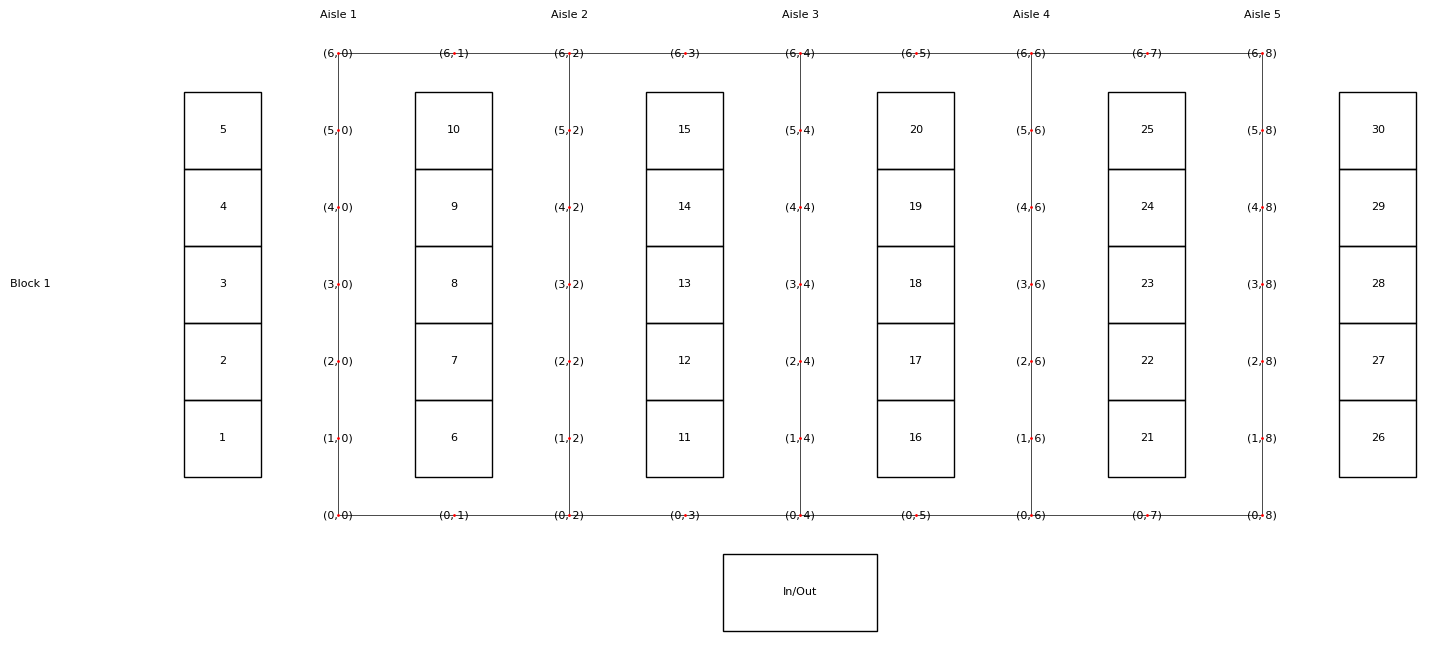

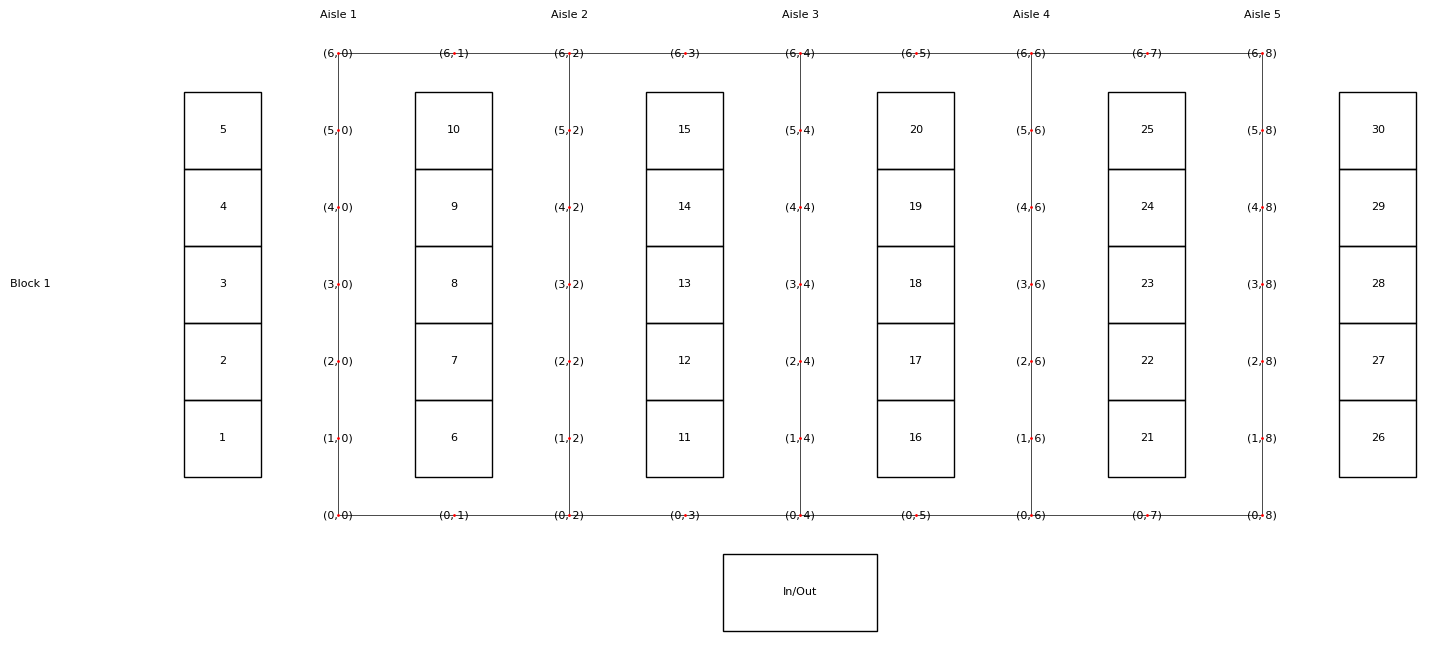

In [1]:
from lp import lp
from miscelaneous import generate_warehouse, get_distance, assign_sections, save_warehouse_frames, create_gif_from_frames
import json

In [2]:
product_names_vector = ["P1", "P2", "P3"]
mean_size_vector = [1, 2, 3]
std_size_vector = [0, 0, 0]
mean_dos_vector = [1, 2, 3]
std_dos_vector = [0, 0, 0]

location_names_vector = ["L1", "L2", "L3", "L4"]

from instance_generator import generate_product_types, generate_location_types
product_types = generate_product_types(product_names_vector, mean_size_vector, std_size_vector, mean_dos_vector, std_dos_vector)
location_types = generate_location_types(location_names_vector)


Set parameter MIPGap to value 0.1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.4.0 24E263)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 600184 rows, 542160 columns and 1297290 nonzeros
Model fingerprint: 0x6ac1cf6e
Variable types: 523800 continuous, 18360 integer (18360 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 342.0000000
Presolve removed 502788 rows and 539730 columns
Presolve time: 0.11s
Presolved: 97396 rows, 2430 columns, 210390 nonzeros
Variable types: 0 continuous, 2430 integer (2430 binary)

Root relaxation: objective 2.240000e+02, 289 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/N

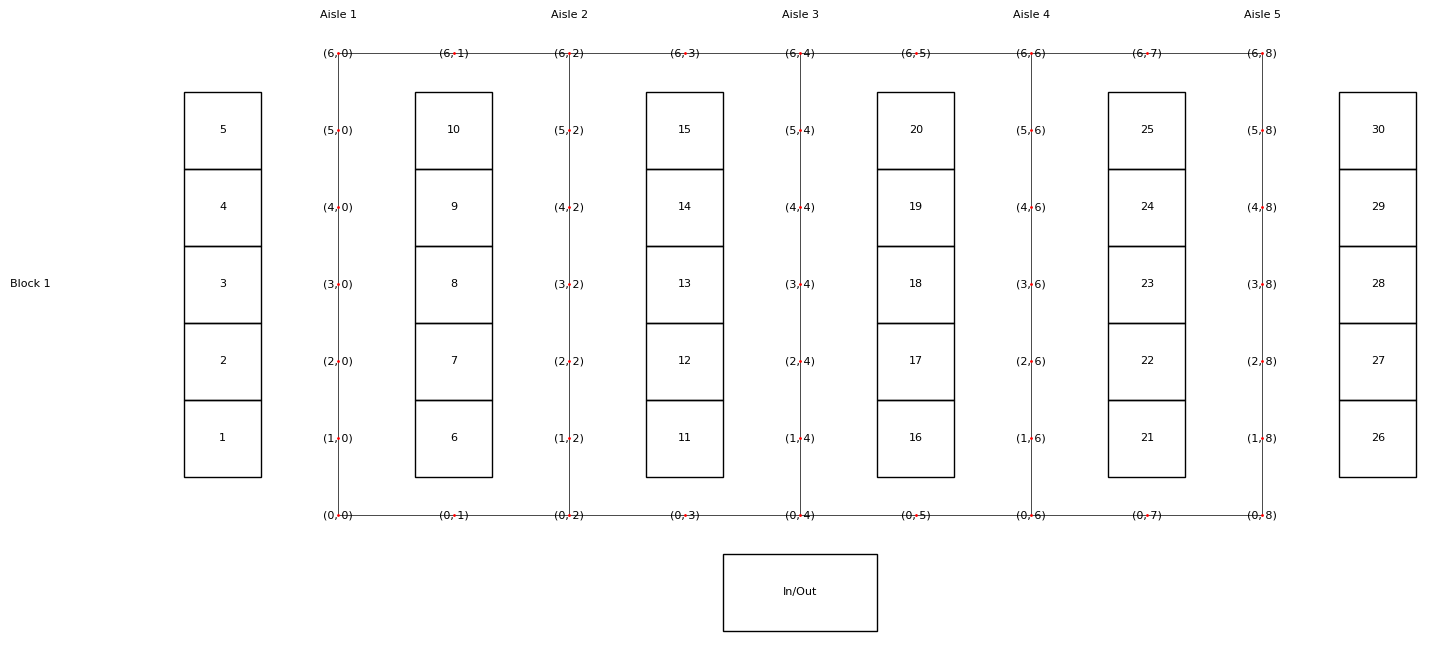

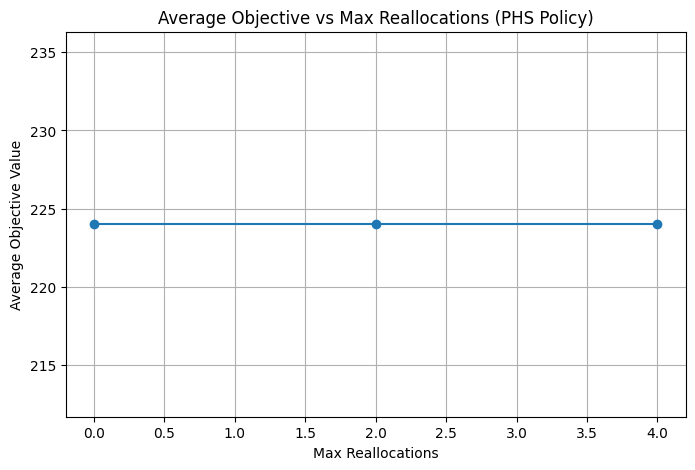

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Define parameters
number_of_blocks = 1
number_of_aisles = 5
number_of_locations_per_aisle = 5
in_out = 4
double_aisle = False

# Generate warehouse and graph
warehouse, G = generate_warehouse(number_of_blocks=number_of_blocks, 
                                  number_of_aisles=number_of_aisles, 
                                  number_of_locations_per_aisle=number_of_locations_per_aisle, 
                                  in_out=in_out, 
                                  double_aisle=double_aisle)
sections = assign_sections(warehouse, 0, G, double_aisle=False)



# Store average objectives
realloc_options = [0, 2, 4]
average_objectives = []

for max_realloc in realloc_options:
    objectives = []
    for seed in [1]:#range(1, 6):  # Seeds 1 to 5
        # Load instance
        with open(f'instances/instances_seed_{seed}.json', 'r') as f:
            instance = json.load(f)

        # Run model
        obj, current_solution, warehouse_states = lp(warehouse, G, product_types, location_types, instance, 0, 
                                                double_aisle=double_aisle, 
                                                policy='phs', 
                                                max_reallocations=max_realloc)

        # Save objective value
        objectives.append(obj)

    avg_obj = np.mean(objectives)
    average_objectives.append(avg_obj)
    print(f"Max realloc {max_realloc}: Avg obj = {avg_obj}")

# Plot results
plt.figure(figsize=(8,5))
plt.plot(realloc_options, average_objectives, marker='o', linestyle='-')
plt.title('Average Objective vs Max Reallocations (PHS Policy)')
plt.xlabel('Max Reallocations')
plt.ylabel('Average Objective Value')
plt.grid(True)
plt.show()
